In [1]:
import pandas as pd
import numpy as np
from numpy.fft import fft, ifft, fftfreq
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from os.path import join, expanduser, dirname, basename, exists
import pickle
import matplotlib.animation as animation
import matplotlib.dates as mdates
from matplotlib.animation import FuncAnimation

fig_dir = '/Users/zachkeskinen/Documents/temp/figures/'
anim_dir = '/Users/zachkeskinen/Documents/temp/figures/animations/'

/var/folders/0n/swn__wf94qd3zdch1tvp087r0000gn/T/ipykernel_16782/396438459.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax5.xaxis.set_ticklabels(dates)


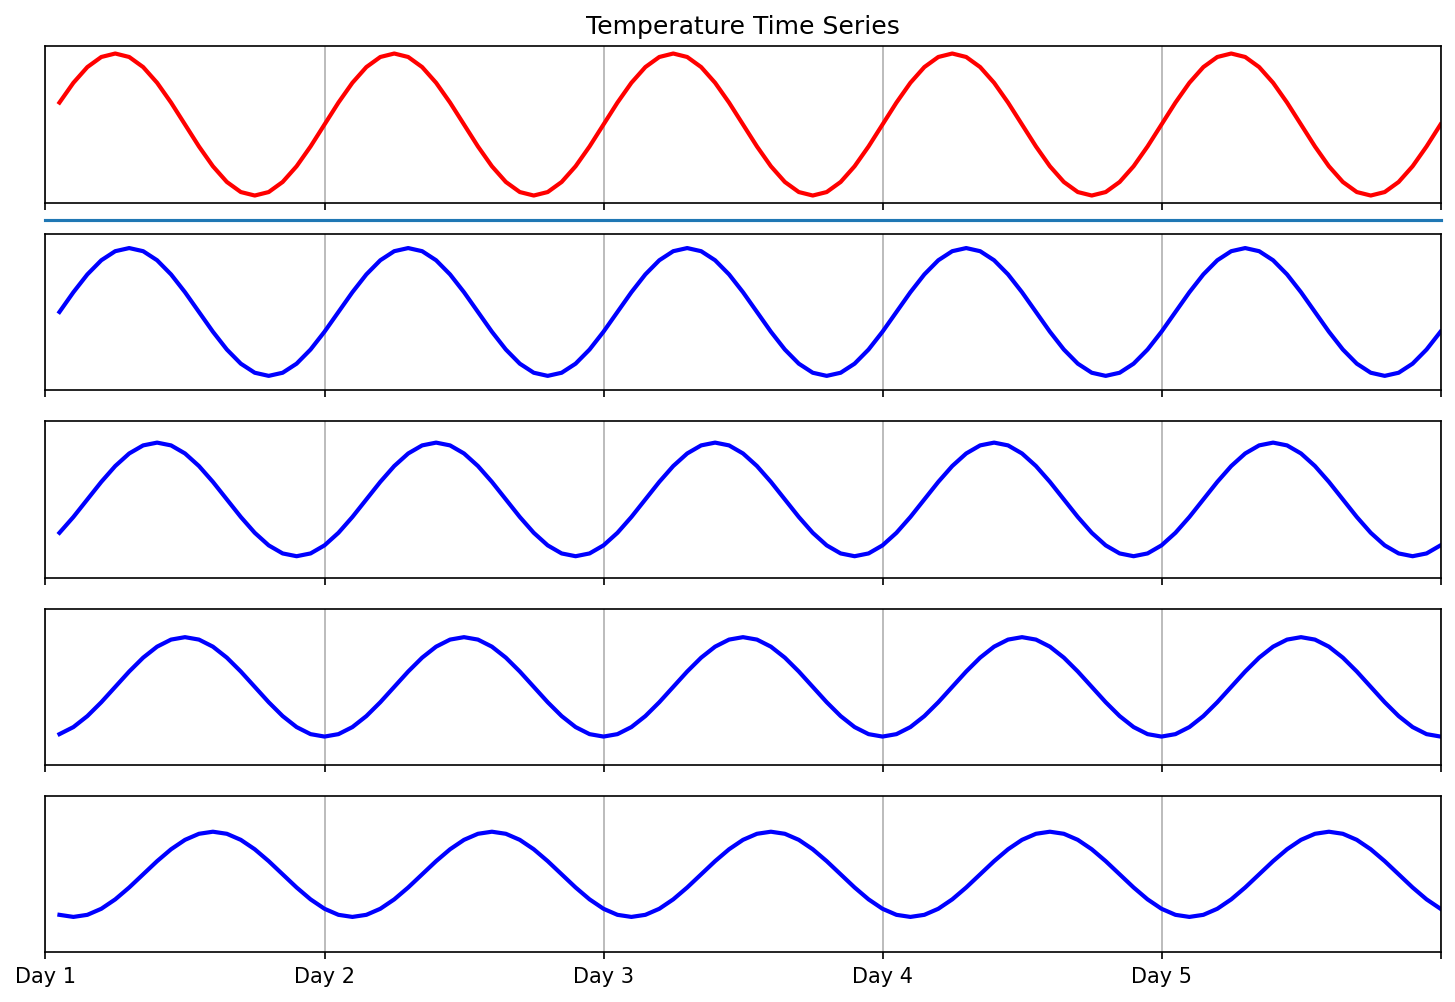

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.transforms as mtrans

def data_gen():
    t = data_gen.t
    cnt = 0
    while cnt < 1000:
        cnt+=1
        t += 0.05
        y1 = np.sin(2*np.pi*t)
        y2 = 0.9*np.sin(2*np.pi*t- 0.1*np.pi)
        y3 = 0.8*np.sin(2*np.pi*t- 0.3*np.pi)
        y4 = 0.7*np.sin(2*np.pi*t- 0.5*np.pi)
        y5 = 0.6*np.sin(2*np.pi*t- 0.7*np.pi)
        # adapted the data generator to yield both sin and cos
        yield t, y1, y2, y3, y4, y5

data_gen.t = 0

# create a figure with two subplots
fig, axes = plt.subplots(5,1, figsize = (12,8), dpi = 150)
ax1, ax2, ax3, ax4, ax5 = axes
# intialize two line objects (one in each axes)
line1, = ax1.plot([], [], lw=2, color='r')
line2, = ax2.plot([], [], lw=2, color='b')
line3, = ax3.plot([], [], lw=2, color='b')
line4, = ax4.plot([], [], lw=2, color='b')
line5, = ax5.plot([], [], lw=2, color='b')
line = [line1, line2, line3, line4, line5]

# the same axes initalizations as before (just now we do it for both of them)
for ax in axes:
    ax.set_ylim(-1.1, 1.1)
    ax.set_xlim(0, 5)
    ax.grid()
    ax.yaxis.set_visible(False)


for ax in [ax1, ax2, ax3, ax4]:
    ax.xaxis.set_ticklabels([])

dates = np.array(['Day 1','Day 2','Day 3', 'Day 4', 'Day 5' ])
ax5.xaxis.set_ticklabels(dates)

ax1.axhline(-1.35, clip_on=False)
ax1.yaxis.set_label('Above Snow')
ax1.set_title('Temperature Time Series')
# initialize the data arrays 
xdata, y1data, y2data, y3data, y4data, y5data = [], [], [], [], [], []
def run(data):
    # update the data
    t, y1, y2, y3, y4, y5 = data
    xdata.append(t)
    y1data.append(y1)
    y2data.append(y2)
    y3data.append(y3)
    y4data.append(y4)
    y5data.append(y5)

    # axis limits checking. Same as before, just for both axes
    for ax in axes:
        xmin, xmax = ax.get_xlim()
        if t >= xmax:
            ax.set_xlim(xmin, 2*xmax)
            ax.figure.canvas.draw()

    # update the data of both line objects
    line[0].set_data(xdata, y1data)
    line[1].set_data(xdata, y2data)
    line[2].set_data(xdata, y3data)
    line[3].set_data(xdata, y4data)
    line[4].set_data(xdata, y5data)

    return line

ani = animation.FuncAnimation(fig, run, data_gen, blit=True, interval=.1,
    repeat=False)
ani.save(join(anim_dir, 'cycletest.gif'))